In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit
%matplotlib inline

In [2]:
n_dots = 200
X = np.linspace(0, 1, n_dots)
y = np.sqrt(X) + 0.2*np.random.randn(n_dots) - 0.1
# 转换成矩阵形式
X = X.reshape(-1, 1)
y = y.reshape(-1, 1)

In [3]:
# 构建一个多项式模型
def polynomial_model(degree=1):
    polynomial_features = PolynomialFeatures(degree=degree, include_bias=False)
    linear_regression = LinearRegression()
    pipeline = Pipeline([('polynomial_features', polynomial_features),
                        ('linear_regression', linear_regression)])
    return pipeline

In [4]:
# 画出学习曲线图


def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=1, train_sizes=np.linspace(0.1, 1, 5)):
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel('Training example')
    plt.ylabel('Score')
    train_sizes, train_scores, test_scores = learning_curve(estimator, X, y, cv=cv, n_jobs=n_jobs,
                                                            train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()
    
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std,
                     alpha=0.1, color='r')
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std,
                     alpha=0.1, color='g')
    plt.plot(train_sizes, train_scores_mean, 'o--', color='r', label='Train score')
    plt.plot(train_sizes, test_scores_mean, 'o-', color='g', label='Test score')
    plt.legend(loc='best')
    return plt

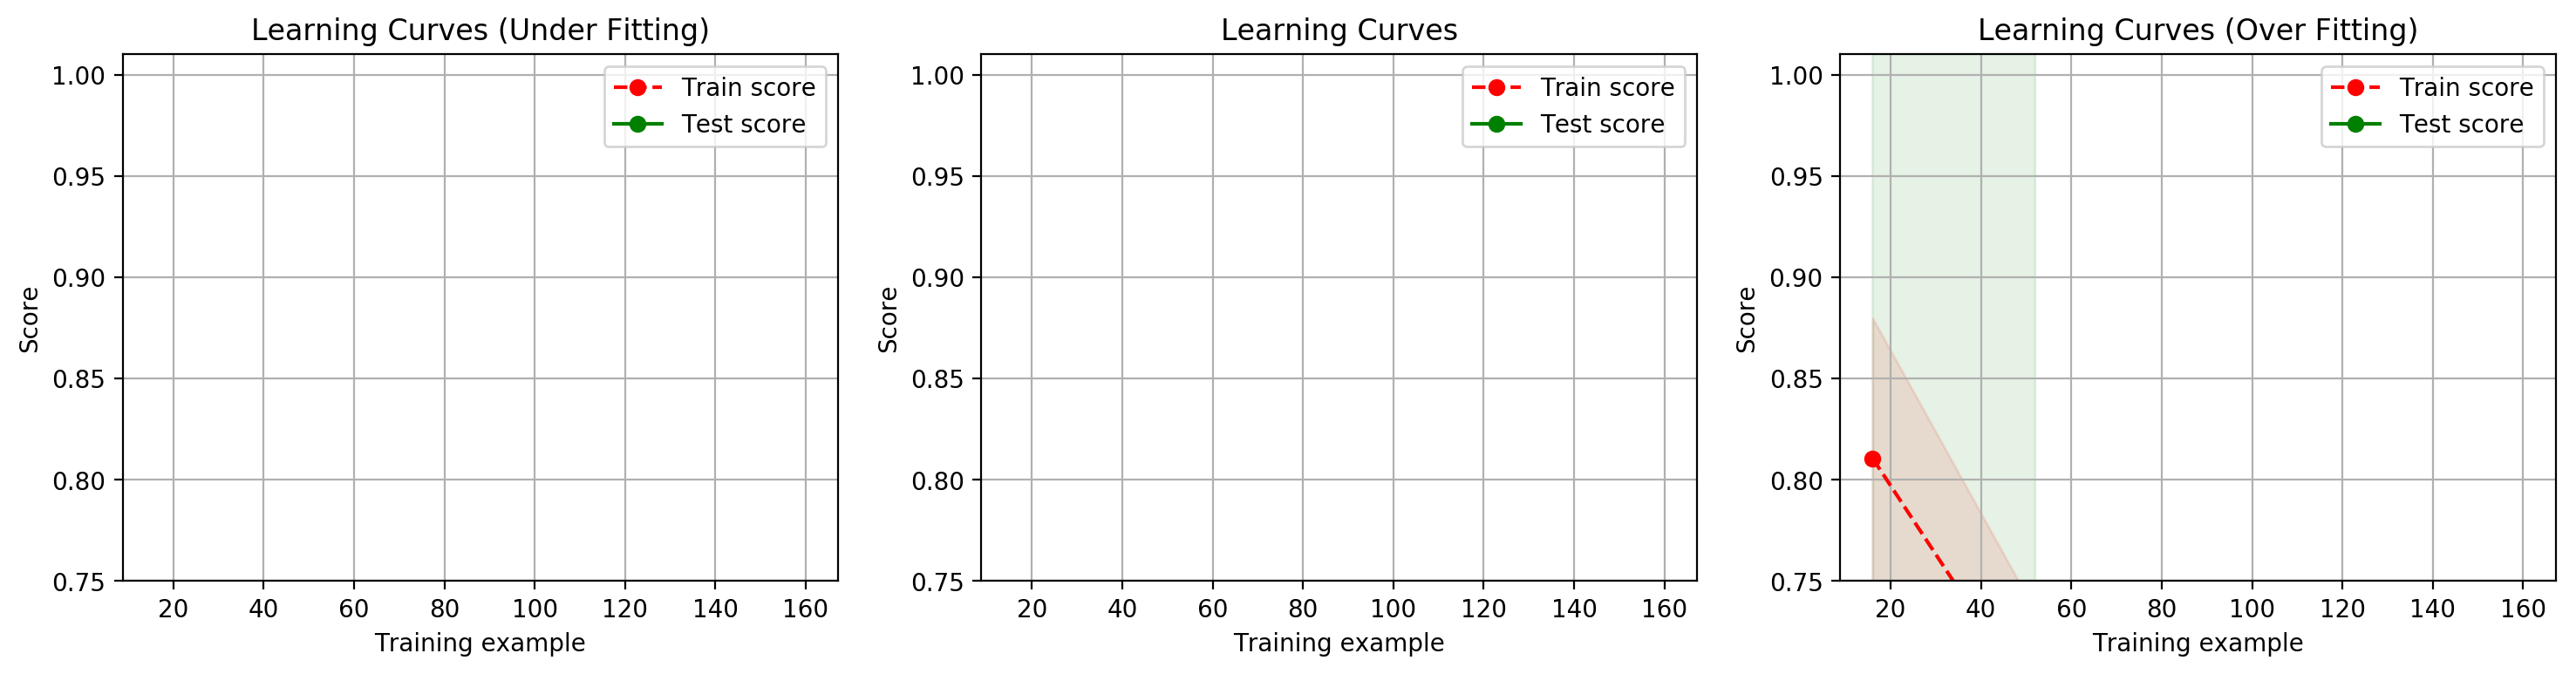

In [5]:
cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=0)
titles = ['Learning Curves (Under Fitting)',
          'Learning Curves',
          'Learning Curves (Over Fitting)']
degrees = [1, 3, 10]

plt.figure(figsize=(18, 4), dpi=200)
for i in range(len(degrees)):
    plt.subplot(1, 3, i + 1)
    plot_learning_curve(polynomial_model(degrees[i]), titles[i], X, y, ylim=(0.75, 1.01), cv=cv)

plt.show()